<a href="https://colab.research.google.com/github/rodmsmendes/reinforcementlearning4fun/blob/master/iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My First Machine Learning Model

This template will help you create your fist machine learning model in 5 minutes.


## 0. Setup

We provide the initial setup of the notebook. In this section we import the necessary libraries so you can build your model.

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

## 1. Load the data

The first step is to load the necessary data. Use the command read_csv from pandas library to load the Iris dataset. After loading the data into a dataframe, show the top of the dataset. The dataset file URL is https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data.

In [0]:
# load the data
cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Explore and visualize the data



After loading the dataset into a dataframe in memory, the next step is to perform an exploratory data analysis. The objective of the EDA is to discover as much information as possible about the dataset. The describe() method is a good starting point. The describe() method prints statistics of the dataset, like mean, standard deviation, etc.

In [0]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A very important tool in exploratory data analysis is data visualization, which helps us to gain insights about the dataset. The plot below shows the relationship between the attributes of the dataset.

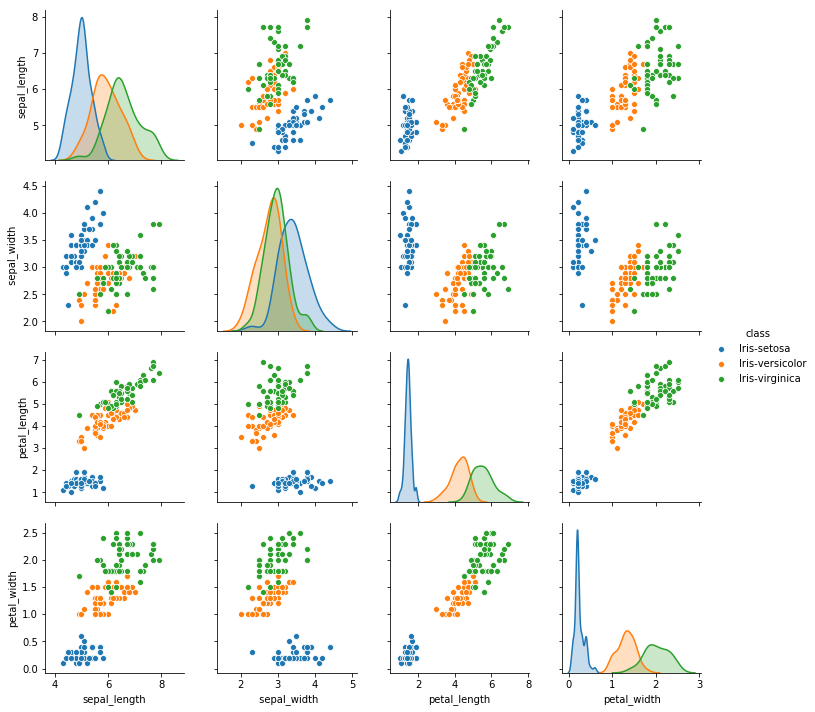

In [0]:
sns.pairplot(df, hue='class');

Another interesting case of data visualization is use a heatmap to visualize the correlation matrix of the dataset.

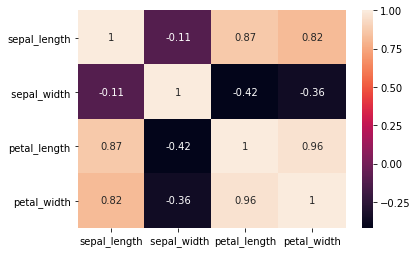

In [0]:
sns.heatmap(df.corr(), annot=True)

## 3. Preprocess the data

Frequently, the dataset collected from databases, files or scraping the internet is not ready
to be consumed by a machine learning algorithm. In most cases, the dataset needs some kind of preparation or preprocessing before being used as input to a machine learning algorithm. In this case, we convert the string values of the class column to integer numbers because the algorithm we are going to use does not process string values.

In [0]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
df['class_encod'] = df['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
df['class_encod'].unique()

array([0, 1, 2])

## 4. Select an algorithm and train the model

After exploring and preprocessing our data we can build our machine learning model to classify Iris specimens. So, the first step is to split our dataframe in input attributes and target attributes. 

In [0]:
y = df[['class_encod']] # target attributes 
X = df.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
y.head()

,class_encod
0,0
1,0
2,0
3,0
4,0


If in the previous step we splited the dataframe by separating columns, in this step we split the data by rows. The method train_test_split() will split the X and y dataframes in training data and test data. 

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

Then we use the datasets X_train and y_train to build a KNN classifier, using the KNeighborsClassifier class provided by scikit-learn. Because the machine learning algorithm is already implemented by the library, all we have to do is call the method fit() passing the X_train and y_train datasets as arguments.

In [0]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Once the model is built, we can use the predict() method to calculate the predicted category of a instance. In this case, we want to predict the class of the first 10 lines of the X_test dataset. The return is an array containing the estimated categories.

In [0]:
m.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [0]:
y_test[0:10]

,class_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


We can use methods like score() and confusion_matrix() to measure the performance of our model. We see that the accuracy of our model is 1.0 (100%), which means that the model predicted correctly all cases of the test dataset. 

In [0]:
m.score(X_test, y_test)

1.0

In [0]:
confusion_matrix(y_test, m.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

## 5. Save the model for later use

Finally, we want to save our model for later use. For example, we could embed our model into a webservice or mobile application. So we use the method dump() from the joblib package to save the model to a file.

In [0]:
dump(m, 'iris-classifier.dmp')

['iris-classifier.dmp']

In [0]:
ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])